In [1]:
import pandas as pd

In [5]:
!git clone https://github.com/urchade/GLiNER.git
%cd GLiNER
!pip install -r requirements.txt

Cloning into 'GLiNER'...
remote: Enumerating objects: 294, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 294 (delta 46), reused 49 (delta 26), pack-reused 214
Receiving objects: 100% (294/294), 844.92 KiB | 3.16 MiB/s, done.
Resolving deltas: 100% (151/151), done.
/content/GLiNER
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 67.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 23.2 MB/s eta 0:00

In [2]:
df = pd.read_excel("Claims_withCategories.xlsx")

In [6]:
from model import GLiNER

model = GLiNER.from_pretrained("urchade/gliner_multi")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

gliner_config.json:   0%|          | 0.00/734 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:550: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [7]:
labels = ["disease", "causative agent", "treatment", "body fluid", "lipid", "food"]

In [12]:
df['entities'] = ''
for index, row in df.iterrows():
    # Check if claim is a string
    claim = row['claim']
    if isinstance(claim, str):
        entities = model.predict_entities(claim, labels)
        # Initialize a string to hold your formatted entities for this claim
        formatted_entities = ""
        for entity in entities:
            formatted_entities += f'{entity["text"]} => {entity["label"]}, '

        # Remove the trailing comma and space
        formatted_entities = formatted_entities.rstrip(', ')
        print(formatted_entities)
        df.at[index, 'entities'] = formatted_entities

chocolate => food, acne => disease
cold => disease, rain => food
Stress => treatment, acne => disease
acne => disease
Varicose veins => disease, standing => treatment
Varicose veins => disease
Varicose veins => disease
Varicose veins => disease, laser therapy => treatment
Varicose veins => disease, sclerotherapy => treatment
Varicose veins => disease, endovenous ablation therapy => treatment
Varicose veins => disease, radiofrequency ablation therapy => treatment
High blood pressure => disease
Tonsillitis => disease, bacterial infection => disease
Tonsillitis => disease, bacterial => causative agent, viral infection => causative agent
Tonsillectomy => treatment, tonsillitis => disease
Tonsillectomy => treatment, tonsillitis => disease, treatments => treatment
Tonsillectomy => treatment, complications => disease
Tonsillectomy => treatment, sore throats => disease
Tonsillectomy => treatment, sore throats => disease, sore throats => disease
sore throats => disease



snoring => disease, sl

In [21]:
from collections import Counter
import pandas as pd

# Assuming df is your DataFrame and 'entities' column exists
label_counts = Counter()

for entities in df['entities']:
    entity_label_pairs = entities.split(',')
    for pair in entity_label_pairs:
        # Split the pair and check if it successfully splits into two parts
        parts = pair.split(' => ')
        if len(parts) == 2:
            _, label = parts
            label_counts[label] += 1
# Convert to DataFrame for easy plotting
labels_df = pd.DataFrame(label_counts.items(), columns=['Label', 'Count'])

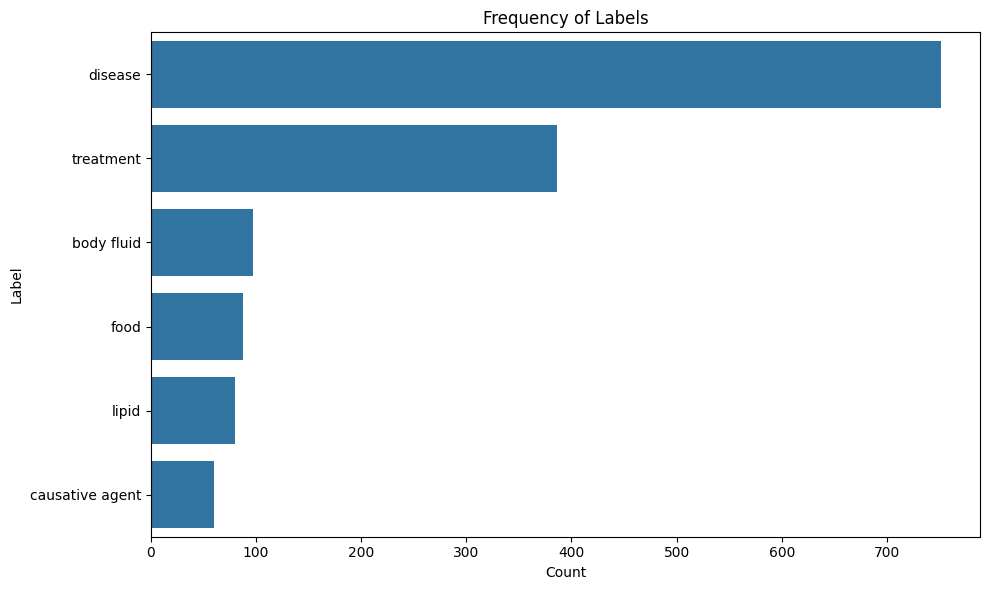

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame for better visualization
labels_df_sorted = labels_df.sort_values(by='Count', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=labels_df_sorted, x='Count', y='Label')
plt.title('Frequency of Labels')
plt.xlabel('Count')
plt.ylabel('Label')
plt.tight_layout()
plt.show()


## Finding Co-occuring entities

In [28]:
entities_by_context = []

for entities in df['entities']:
    entity_label_pairs = entities.split(', ')
    context_entities = [pair.split(' => ')[1] for pair in entity_label_pairs if ' => ' in pair]
    entities_by_context.append(context_entities)

In [29]:
from itertools import combinations
from collections import Counter

co_occurrences = Counter()

for context_entities in entities_by_context:
    # Generate all possible pairs of entities within the context
    for pair in combinations(context_entities, 2):
        # Sort the pair to ensure consistency (A, B) is treated the same as (B, A)
        sorted_pair = tuple(sorted(pair))
        co_occurrences[sorted_pair] += 1


In [31]:
# Display the 10 most common co-occurring entity pairs
for pair, count in co_occurrences.most_common(10):
    print(f"Pair: {pair}, Count: {count}")

Pair: ('disease', 'treatment'), Count: 281
Pair: ('disease', 'disease'), Count: 202
Pair: ('treatment', 'treatment'), Count: 80
Pair: ('disease', 'food'), Count: 63
Pair: ('disease', 'lipid'), Count: 53
Pair: ('body fluid', 'disease'), Count: 48
Pair: ('body fluid', 'treatment'), Count: 33
Pair: ('causative agent', 'disease'), Count: 32
Pair: ('lipid', 'lipid'), Count: 20
Pair: ('causative agent', 'causative agent'), Count: 17


In [32]:
# Assuming co_occurrences is your Counter object with the co-occurrence counts
most_common_pairs = co_occurrences.most_common(10)

# Separate the entity pairs and their counts into two lists
pairs = [f"{pair[0]} & {pair[1]}" for pair, count in most_common_pairs]
counts = [count for pair, count in most_common_pairs]

<ipython-input-33-e57747f190c6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=pairs, palette="viridis")


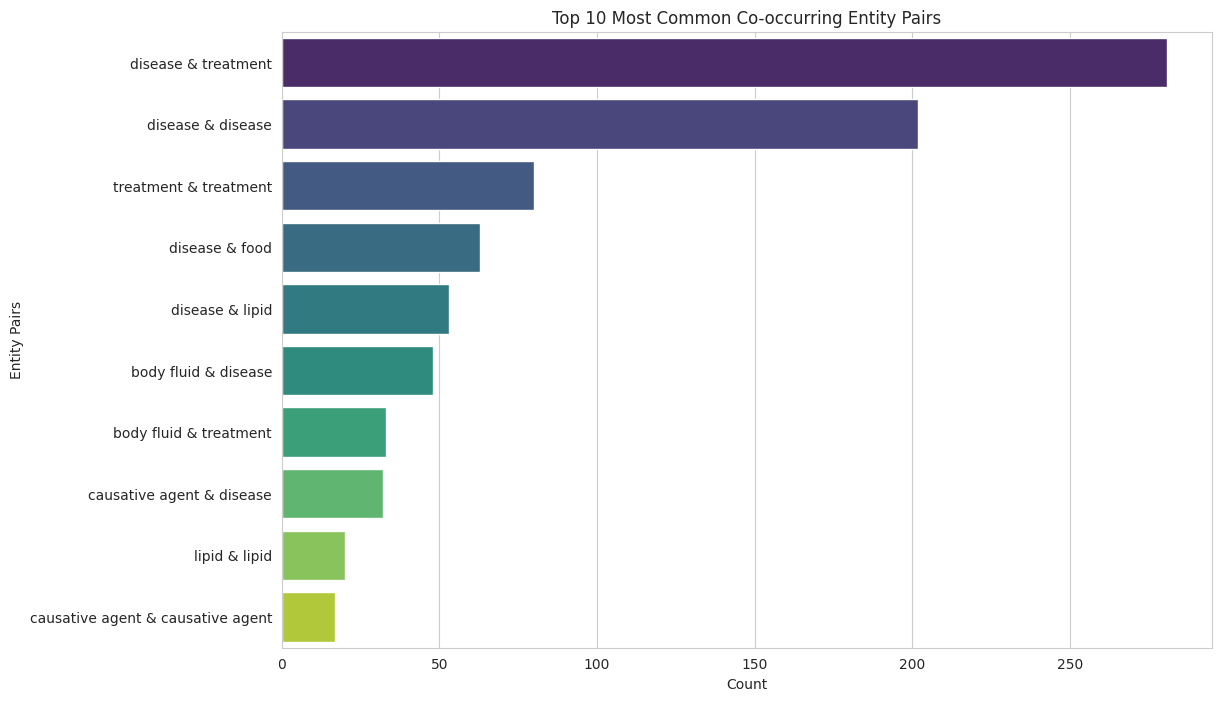

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x=counts, y=pairs, palette="viridis")

plt.title('Top 10 Most Common Co-occurring Entity Pairs')
plt.xlabel('Count')
plt.ylabel('Entity Pairs')

plt.show()